In [1578]:
import pandas as pd

In [1579]:
hopital1 = pd.read_json("liver.json")

In [1580]:
display(hopital1.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1


In [1581]:
hopital2 = pd.read_csv("liver.csv")
display(hopital2.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,Result
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0 mg/dL,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0 mg/dL,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0 mg/dL,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0 mg/dL,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0 mg/dL,3.9,0.9,1


In [1582]:

hopital1.rename(columns={
    'Alamine_Aminotransferase': 'ALT',
    'Aspartate_Aminotransferase': 'AST',
    'Albumin_and_Globulin_Ratio': 'AGR'
}, inplace=True)

hopital2.rename(columns={
    'Result': 'Outcome', 
    'Albumin_and_Globulin_Ratio': 'AGR'
}, inplace=True)

In [1583]:
display(hopital1.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1


In [1584]:
display(hopital2.head())

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0 mg/dL,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0 mg/dL,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0 mg/dL,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0 mg/dL,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0 mg/dL,3.9,0.9,1


In [1585]:
print(hopital2.dtypes)

Age                      object
Gender                   object
Total_Bilirubin         float64
Direct_Bilirubin        float64
Alkaline_Phosphotase    float64
ALT                     float64
AST                       int64
Total_Proteins           object
Albumin                 float64
AGR                     float64
Outcome                   int64
dtype: object


In [1586]:
#Transformation concernant la colonne Total_Proteins
# 2. Suppression de l'unité " mg/dL"
# On s'assure que toutes les valeurs sont des chaînes de caractères avant d'appliquer la suppression.
hopital2['Total_Proteins'] = hopital2['Total_Proteins'].astype(str).str.replace(' mg/dL', '', regex=False)

# 3. Conversion de la colonne en type numérique (float)
# 'errors="coerce"' convertit toute valeur non numérique restante en NaN (valeur manquante).
hopital2['Total_Proteins'] = pd.to_numeric(hopital2['Total_Proteins'], errors='coerce')

# 4. Affichage des résultats pour vérification
print("Type de données de la colonne 'Total_Proteins' après nettoyage :")
print(hopital2['Total_Proteins'].dtype)

print("\nPremières valeurs de la colonne 'Total_Proteins' après nettoyage :")
print(hopital2['Total_Proteins'].head())

Type de données de la colonne 'Total_Proteins' après nettoyage :
float64

Premières valeurs de la colonne 'Total_Proteins' après nettoyage :
0    7800.0
1    7100.0
2    7700.0
3    8300.0
4    8000.0
Name: Total_Proteins, dtype: float64


In [1587]:
import pandas as pd

def mg_par_dl_vers_g_par_dl(valeur_mg_par_dl):
    """
    Convertit une valeur de milligrammes par décilitre (mg/dL) en 
    grammes par décilitre (g/dL).

    Args:
        valeur_mg_par_dl (float/int): La concentration en mg/dL.

    Returns:
        float: La concentration convertie en g/dL.
    """
    # Si la valeur est nulle (NaN), on la retourne telle quelle
    if pd.isna(valeur_mg_par_dl):
        return valeur_mg_par_dl
    
    # Division par 1000 pour la conversion (1g = 1000mg)
    return valeur_mg_par_dl / 1000

In [1588]:
hopital2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,41 to 60 yo,Male,7.0,2.0,174.0,NaN,14,7800.0,4.2,NaN,2
1,41 to 60 yo,Male,6.0,2.0,245.0,22.0,24,7100.0,3.4,0.9,1
2,21 to 40 yo,Male,11.0,5.0,191.0,37.0,41,7700.0,4.3,NaN,2
3,21 to 40 yo,Male,24.0,10.0,340.0,25.0,21,8300.0,4.5,NaN,1
4,21 to 40 yo,Male,6.0,2.0,202.0,NaN,41,8000.0,3.9,0.9,1


In [1589]:
hopital2['Total_Proteins'] = hopital2['Total_Proteins'] / 1000

In [1590]:
hopital1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,61 to 80 yo,Female,0.7,0.1,187.0,NaN,18,6.8,3.3,0.90,1
1,61 to 80 yo,Male,10.9,5.5,699.0,64.0,100,7.5,NaN,0.74,1
2,61 to 80 yo,Male,7.3,4.1,490.0,NaN,68,7.0,3.3,NaN,1
3,41 to 60 yo,Male,1.0,0.4,182.0,14.0,20,6.8,3.4,1.00,1
4,61 to 80 yo,Male,3.9,2.0,195.0,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
286,21 to 40 yo,Female,0.8,0.2,192.0,15.0,12,8.6,4.7,1.20,1
287,41 to 60 yo,Male,1.3,0.6,155.0,15.0,20,8.0,4.0,1.00,2
288,41 to 60 yo,Female,1.0,0.5,239.0,16.0,39,7.5,3.7,NaN,1
289,41 to 60 yo,Male,4.5,2.3,315.0,120.0,105,7.0,4.0,NaN,1


In [1591]:
#Tranformation de la colonne Age
print("Valeurs uniques de 'Age' avant normalisation :")
print(hopital2['Age'].unique())

Valeurs uniques de 'Age' avant normalisation :
['41 to 60 yo' '21 to 40 yo' '61 to 80 yo' '<20 yo' '>80 yo']


In [1592]:
print("Valeurs uniques de 'Age' avant normalisation :")
print(hopital1['Age'].unique())

Valeurs uniques de 'Age' avant normalisation :
['61 to 80 yo' '41 to 60 yo' '21 to 40 yo' '<20 yo' '>80 yo']


In [1593]:
# 1. Dictionnaire de mapping ordinal
age_mapping = {
    '<20 yo': 1,
    '21 to 40 yo': 2,
    '41 to 60 yo': 3,
    '61 to 80 yo': 4,
    '81 to 100 yo': 5
}

# 2. Fonction pour encoder l'âge
def encode_age(df):
    df['Age'] = df['Age'].map(age_mapping)
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    return df

# 3. Application aux deux DataFrames
hopital1 = encode_age(hopital1)
hopital2 = encode_age(hopital2)

# Vérification
print("Types après encodage:")
print(f"Hopital1 Age: {hopital1['Age'].dtype}")
print(f"Hopital2 Age: {hopital2['Age'].dtype}")


Types après encodage:
Hopital1 Age: float64
Hopital2 Age: float64


In [1594]:
import numpy as np

# Pour hopital2
hopital2['Age'] = hopital2['Age'].fillna(-999).astype(int).replace(-999, np.nan)
hopital2['Age'] = hopital2['Age'].astype('Int64')

# Pour hopital1
hopital1['Age'] = hopital1['Age'].fillna(-999).astype(int).replace(-999, np.nan)
hopital1['Age'] = hopital1['Age'].astype('Int64')
hopital1['Alkaline_Phosphotase'] = hopital1['Alkaline_Phosphotase'].fillna(-999).astype(int).replace(-999, np.nan)
hopital1['Alkaline_Phosphotase'] = hopital1['Alkaline_Phosphotase'].astype('Int64')

# Pour Alkaline_Phosphotase dans hopital2
hopital2['Alkaline_Phosphotase'] = hopital2['Alkaline_Phosphotase'].fillna(-999).astype(int).replace(-999, np.nan)
hopital2['Alkaline_Phosphotase'] = hopital2['Alkaline_Phosphotase'].astype('Int64')

In [1595]:
hopital2.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,3,Male,7.0,2.0,174,NaN,14,7.8,4.2,NaN,2
1,3,Male,6.0,2.0,245,22.0,24,7.1,3.4,0.9,1
2,2,Male,11.0,5.0,191,37.0,41,7.7,4.3,NaN,2
3,2,Male,24.0,10.0,340,25.0,21,8.3,4.5,NaN,1
4,2,Male,6.0,2.0,202,NaN,41,8.0,3.9,0.9,1


In [1596]:
hopital1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,Female,0.7,0.1,187,NaN,18,6.8,3.3,0.90,1
1,4,Male,10.9,5.5,699,64.0,100,7.5,NaN,0.74,1
2,4,Male,7.3,4.1,490,NaN,68,7.0,3.3,NaN,1
3,3,Male,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,Male,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1


In [1597]:
hopital1['Gender'] = hopital1['Gender'].map({'Male': 1, 'Female': 0})
hopital1['Gender'] = hopital1['Gender'].fillna(-999).astype(int).replace(-999, np.nan)
hopital1['Gender'] = hopital1['Gender'].astype('Int64')

# Pour hopital2
hopital2['Gender'] = hopital2['Gender'].map({'Male': 1, 'Female': 0})
hopital2['Gender'] = hopital2['Gender'].fillna(-999).astype(int).replace(-999, np.nan)
hopital2['Gender'] = hopital2['Gender'].astype('Int64')

In [1598]:
hopital1

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,NaN,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,NaN,0.74,1
2,4,1,7.3,4.1,490,NaN,68,7.0,3.3,NaN,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
286,2,0,0.8,0.2,192,15.0,12,8.6,4.7,1.20,1
287,3,1,1.3,0.6,155,15.0,20,8.0,4.0,1.00,2
288,3,0,1.0,0.5,239,16.0,39,7.5,3.7,NaN,1
289,3,1,4.5,2.3,315,120.0,105,7.0,4.0,NaN,1


In [1599]:
df_combined = pd.concat([hopital1, hopital2], ignore_index=True)

df_combined


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,NaN,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,NaN,0.74,1
2,4,1,7.3,4.1,490,NaN,68,7.0,3.3,NaN,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,14.0,5.0,269,58.0,45,6.7,3.9,1.40,1
608,4,1,7.0,1.0,196,20.0,35,5.8,2.0,0.50,1
609,4,1,28.0,13.0,250,NaN,29,2.7,0.9,0.50,1
610,3,1,9.0,3.0,901,23.0,17,6.2,3.5,1.20,1


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>],
       [<Axes: title={'center': 'Direct_Bilirubin'}>,
        <Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'ALT'}>],
       [<Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'Total_Proteins'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'AGR'}>,
        <Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

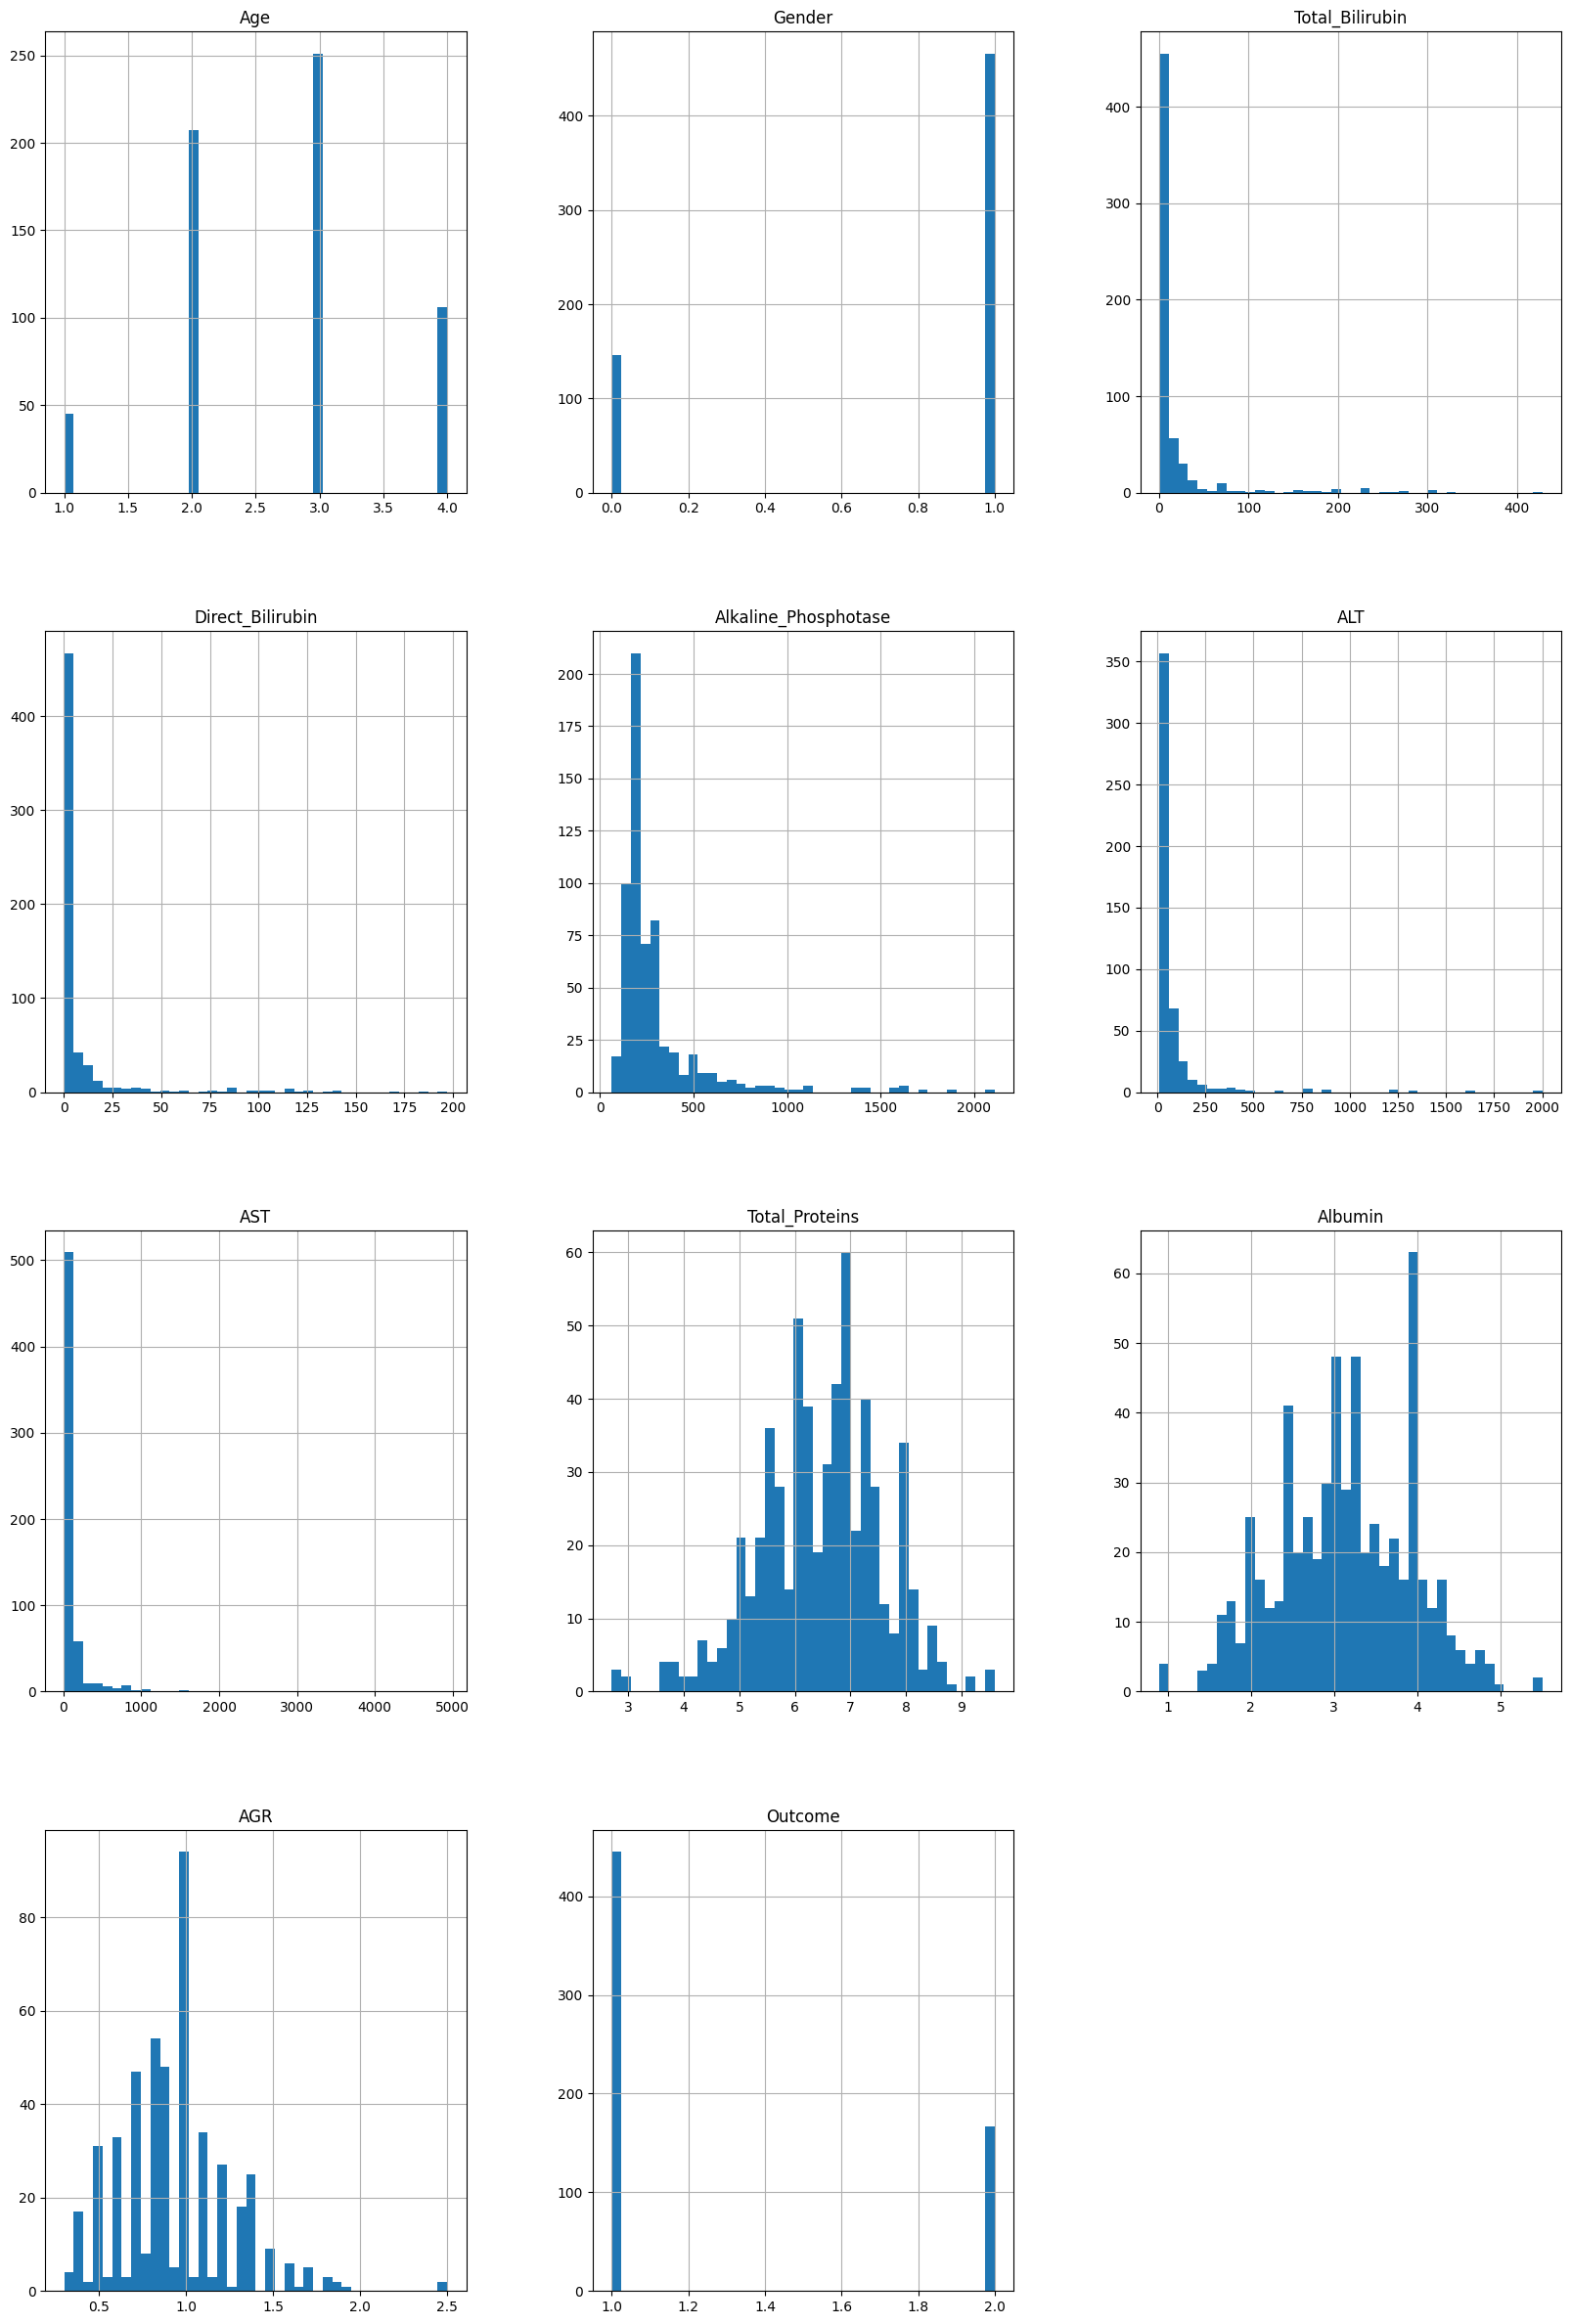

In [1600]:
df_combined.hist(bins=40, figsize=(20, 30))

In [1601]:

df_combined3=df_combined.copy() 
df_combined3

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,NaN,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,NaN,0.74,1
2,4,1,7.3,4.1,490,NaN,68,7.0,3.3,NaN,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,14.0,5.0,269,58.0,45,6.7,3.9,1.40,1
608,4,1,7.0,1.0,196,20.0,35,5.8,2.0,0.50,1
609,4,1,28.0,13.0,250,NaN,29,2.7,0.9,0.50,1
610,3,1,9.0,3.0,901,23.0,17,6.2,3.5,1.20,1


In [1602]:
print("doublons:", df_combined.duplicated().sum())
df_combined = df_combined.drop_duplicates()

df_combined

doublons: 5


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,NaN,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,NaN,0.74,1
2,4,1,7.3,4.1,490,NaN,68,7.0,3.3,NaN,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,14.0,5.0,269,58.0,45,6.7,3.9,1.40,1
608,4,1,7.0,1.0,196,20.0,35,5.8,2.0,0.50,1
609,4,1,28.0,13.0,250,NaN,29,2.7,0.9,0.50,1
610,3,1,9.0,3.0,901,23.0,17,6.2,3.5,1.20,1


In [1603]:
print("Valeurs manquantes par colonne:")
print(df_combined.isna().sum())
na_columns = df_combined.columns[df_combined.isna().any()].tolist()

Valeurs manquantes par colonne:
Age                       3
Gender                    0
Total_Bilirubin           5
Direct_Bilirubin          5
Alkaline_Phosphotase      5
ALT                     121
AST                       0
Total_Proteins           13
Albumin                   6
AGR                     123
Outcome                   0
dtype: int64


In [1604]:
import pandas as pd
import numpy as np

# Remplacer les valeurs manquantes par la médiane dans df_combined
df_combined = df_combined.fillna(df_combined.median(numeric_only=True))

In [1605]:
df_combined['AST'] = df_combined['AST'].fillna(-999).astype('int64').replace(-999, np.nan)
df_combined['AST'] = df_combined['AST'].astype('Int64')

In [1606]:
df_combined

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,36.0,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,3.1,0.74,1
2,4,1,7.3,4.1,490,36.0,68,7.0,3.3,0.90,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,14.0,5.0,269,58.0,45,6.7,3.9,1.40,1
608,4,1,7.0,1.0,196,20.0,35,5.8,2.0,0.50,1
609,4,1,28.0,13.0,250,36.0,29,2.7,0.9,0.50,1
610,3,1,9.0,3.0,901,23.0,17,6.2,3.5,1.20,1


In [1607]:
# 4. Imputation KNN

from sklearn.impute import KNNImputer


def data_imputation(df, cols = []):
    int_columns = df.select_dtypes(include='int').columns.tolist()
    imputer = KNNImputer(n_neighbors=5)
    df_imputed = df.copy()
    df_imputed = pd.DataFrame(imputer.fit_transform(df_imputed), columns=df.columns)
    df_imputed[int_columns] = df_imputed[int_columns].round(0).astype(int)

    return df_imputed

df_imputed = data_imputation(df_combined, na_columns)

df_imputed

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome
0,4,0,0.7,0.1,187,36.0,18,6.8,3.3,0.90,1
1,4,1,10.9,5.5,699,64.0,100,7.5,3.1,0.74,1
2,4,1,7.3,4.1,490,36.0,68,7.0,3.3,0.90,1
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1
4,4,1,3.9,2.0,195,27.0,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
602,1,1,14.0,5.0,269,58.0,45,6.7,3.9,1.40,1
603,4,1,7.0,1.0,196,20.0,35,5.8,2.0,0.50,1
604,4,1,28.0,13.0,250,36.0,29,2.7,0.9,0.50,1
605,3,1,9.0,3.0,901,23.0,17,6.2,3.5,1.20,1


In [1608]:
def detect_outliers(df, num_std=2, threshold=1):
    # Select only numeric columns    
    outliers = pd.DataFrame(index=df.index)
    for col in df.select_dtypes(include=['number']).columns:
        mean = df[col].mean()
        std_dev = df[col].std()

        # Define the lower and upper bounds for outliers
        lower_bound = mean - num_std * std_dev
        upper_bound = mean + num_std * std_dev

        # Find outliers for the current column
        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    # Count the number of dimensions where a row is considered an outlier
    outliers['outlier_count'] = outliers.sum(axis=1)
    print(outliers)

    print(outliers['outlier_count'])
    
    # Identify rows that exceed the threshold of outlier dimensions
    df['is_outlier'] = outliers['outlier_count'] >= threshold
    
    return df


def remove_outliers(df, threshold, num_std):
    df_outliers = detect_outliers(df, num_std=num_std, threshold=threshold)
    return df[df_outliers['is_outlier']==False]

df_outliers = remove_outliers(df_imputed,2,1)
df_outliers



       Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     True    True            False             False                 False   
1     True   False            False             False                  True   
2     True   False            False             False                 False   
3    False   False            False             False                 False   
4     True   False            False             False                 False   
..     ...     ...              ...               ...                   ...   
602   True   False            False             False                 False   
603   True   False            False             False                 False   
604   True   False            False             False                 False   
605  False   False            False             False                  True   
606  False   False            False             False                 False   

       ALT    AST  Total_Proteins  Albumin    AGR  

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,Outcome,is_outlier
2,4,1,7.3,4.1,490,36.0,68,7.0,3.3,0.90,1,False
3,3,1,1.0,0.4,182,14.0,20,6.8,3.4,1.00,1,False
6,2,0,0.9,0.2,154,16.0,12,7.0,3.5,1.00,1,False
7,2,0,0.9,0.3,202,14.0,11,6.7,3.6,1.10,1,False
9,3,1,0.7,0.2,290,53.0,58,6.8,3.4,1.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
592,4,1,7.0,2.0,145,53.0,41,5.8,2.7,0.90,1,False
597,3,1,6.0,2.0,290,26.0,21,6.0,3.0,1.00,1,False
598,3,1,57.0,28.0,214,36.0,850,7.3,3.2,0.78,1,False
605,3,1,9.0,3.0,901,23.0,17,6.2,3.5,1.20,1,False


In [1609]:
print(df_imputed['Outcome'].value_counts())
def smote(df):
    X = df.drop('Outcome', axis=1)  
    y = df['Outcome']  
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)
    df_smote = pd.concat([X_smote, y_smote], axis=1)
    return df_smote




df_smote = smote(df_imputed)
df_smote

Outcome
1    442
2    165
Name: count, dtype: int64


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,is_outlier,Outcome
0,4,0,0.700000,0.100000,187,36.000000,18,6.800000,3.300000,0.900000,True,1
1,4,1,10.900000,5.500000,699,64.000000,100,7.500000,3.100000,0.740000,True,1
2,4,1,7.300000,4.100000,490,36.000000,68,7.000000,3.300000,0.900000,False,1
3,3,1,1.000000,0.400000,182,14.000000,20,6.800000,3.400000,1.000000,False,1
4,4,1,3.900000,2.000000,195,27.000000,59,7.300000,2.400000,0.400000,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
879,2,1,6.737421,3.022708,161,42.326760,40,5.805330,2.346002,0.646002,True,2
880,2,1,2.476046,0.849842,179,29.533544,42,6.830032,3.473481,1.130032,False,2
881,3,0,1.497567,0.432522,215,36.000000,28,5.867478,3.125608,1.141869,True,2
882,1,0,6.151459,1.753649,194,32.273723,35,7.363139,3.586314,0.952847,True,2


In [1610]:
from sklearn.preprocessing import MinMaxScaler

def min_max_scaling(df):
    scaler = MinMaxScaler()
    outcome = df['Outcome']  # Correction : 'Outcome' avec majuscule
    features = df.drop(columns='Outcome')  # Correction : 'Outcome' avec majuscule

    features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    df_normalized = pd.concat([features_normalized, outcome.reset_index(drop=True)], axis=1)

    return df_normalized

df_normalized = min_max_scaling(df_smote)  # Correction : df_oversampled au lieu de df_over
df_normalized

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,ALT,AST,Total_Proteins,Albumin,AGR,is_outlier,Outcome
0,1.000000,0.0,0.000468,0.000000,0.060576,0.013065,0.001626,0.594203,0.521739,0.272727,1.0,1
1,1.000000,1.0,0.024327,0.027425,0.310699,0.027136,0.018296,0.695652,0.478261,0.200000,1.0,1
2,1.000000,1.0,0.015906,0.020315,0.208598,0.013065,0.011791,0.623188,0.521739,0.272727,0.0,1
3,0.666667,1.0,0.001170,0.001524,0.058134,0.002010,0.002033,0.594203,0.543478,0.318182,0.0,1
4,1.000000,1.0,0.007953,0.009650,0.064485,0.008543,0.009961,0.666667,0.326087,0.045455,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.333333,1.0,0.014590,0.014844,0.047875,0.016245,0.006099,0.450048,0.314348,0.157274,1.0,2
880,0.333333,1.0,0.004622,0.003808,0.056668,0.009816,0.006505,0.598555,0.559452,0.377287,0.0,2
881,0.666667,0.0,0.002333,0.001689,0.074255,0.013065,0.003659,0.459055,0.483828,0.382668,1.0,2
882,0.000000,0.0,0.013220,0.008398,0.063996,0.011193,0.005082,0.675817,0.583981,0.296749,1.0,2


In [1611]:
def standardisation(df):
    scaler = StandardScaler()
    outcome = df['Outcome']
    features = df.drop(columns=['Outcome'])
    features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns) 
    df_standardized = pd.concat([features_normalized, outcome.reset_index(drop=True)], axis=1)
    return df_standardized

df_standardized = standardisation(df_smote)
df_standardized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   884 non-null    float64
 1   Gender                884 non-null    float64
 2   Total_Bilirubin       884 non-null    float64
 3   Direct_Bilirubin      884 non-null    float64
 4   Alkaline_Phosphotase  884 non-null    float64
 5   ALT                   884 non-null    float64
 6   AST                   884 non-null    float64
 7   Total_Proteins        884 non-null    float64
 8   Albumin               884 non-null    float64
 9   AGR                   884 non-null    float64
 10  is_outlier            884 non-null    float64
 11  Outcome               884 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 83.0 KB


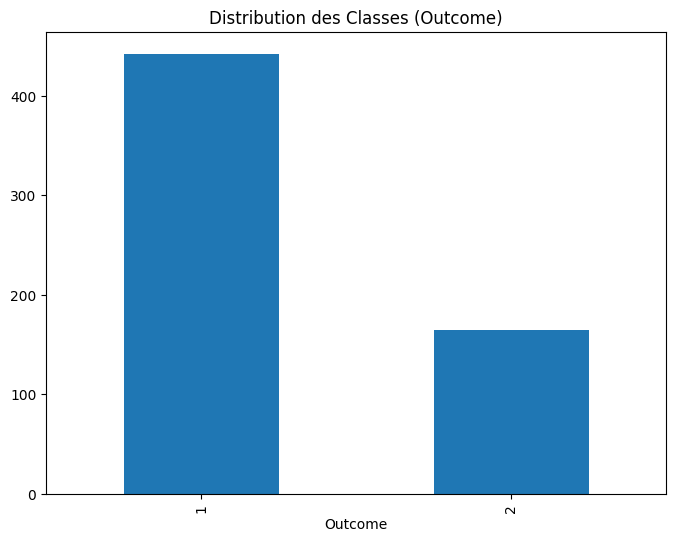

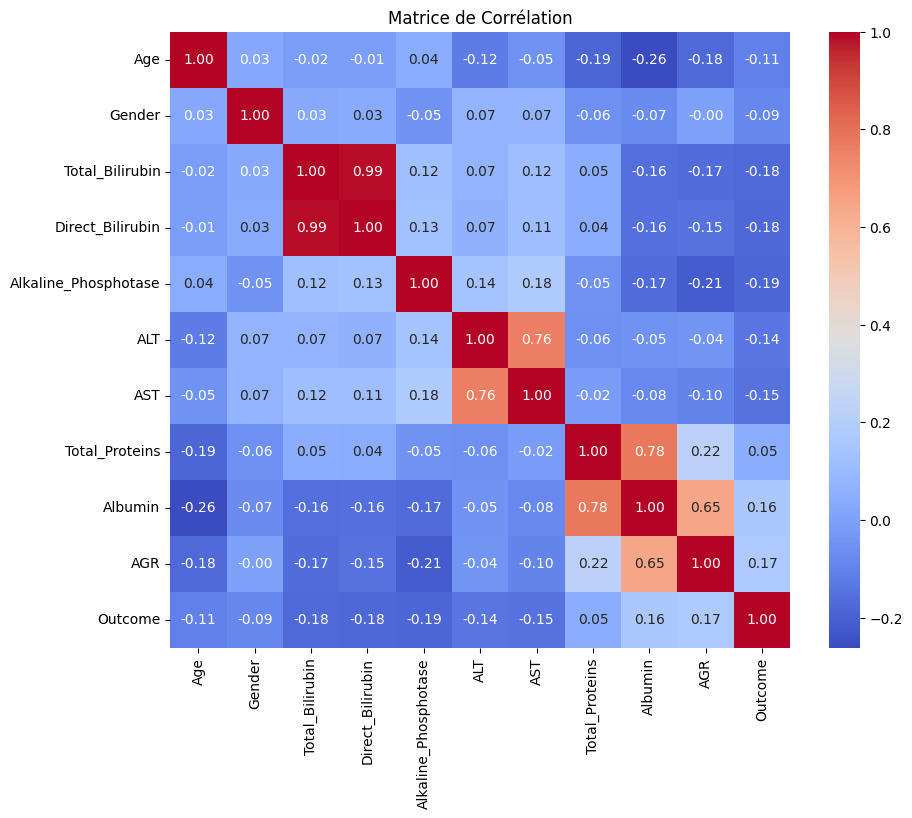

=== RAPPORT ===
Échantillons: 607, Features: 10
Valeurs manquantes: 0
Distribution Outcome:
Outcome
1    442
2    165
Name: count, dtype: int64


In [1612]:
import matplotlib.pyplot as plt
import seaborn as sns


def analyze_clean_dataset_simple(df):
    """Version simplifiée de l'analyse"""
    
    # 1. Distribution des classes
    plt.figure(figsize=(8, 6))
    df['Outcome'].value_counts().plot(kind='bar')
    plt.title('Distribution des Classes (Outcome)')
    plt.show()
    
    # 2. Matrice de corrélation
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Matrice de Corrélation')
    plt.show()
    
    # 3. Rapport
    print("=== RAPPORT ===")
    print(f"Échantillons: {len(df)}, Features: {len(df.columns)-1}")
    print(f"Valeurs manquantes: {df.isnull().sum().sum()}")
    print("Distribution Outcome:")
    print(df['Outcome'].value_counts())

# Utilise df_clean si défini, sinon tombe en back-up sur df_combined
try:
    analyze_clean_dataset_simple(df_clean)
except NameError:
    analyze_clean_dataset_simple(df_combined)

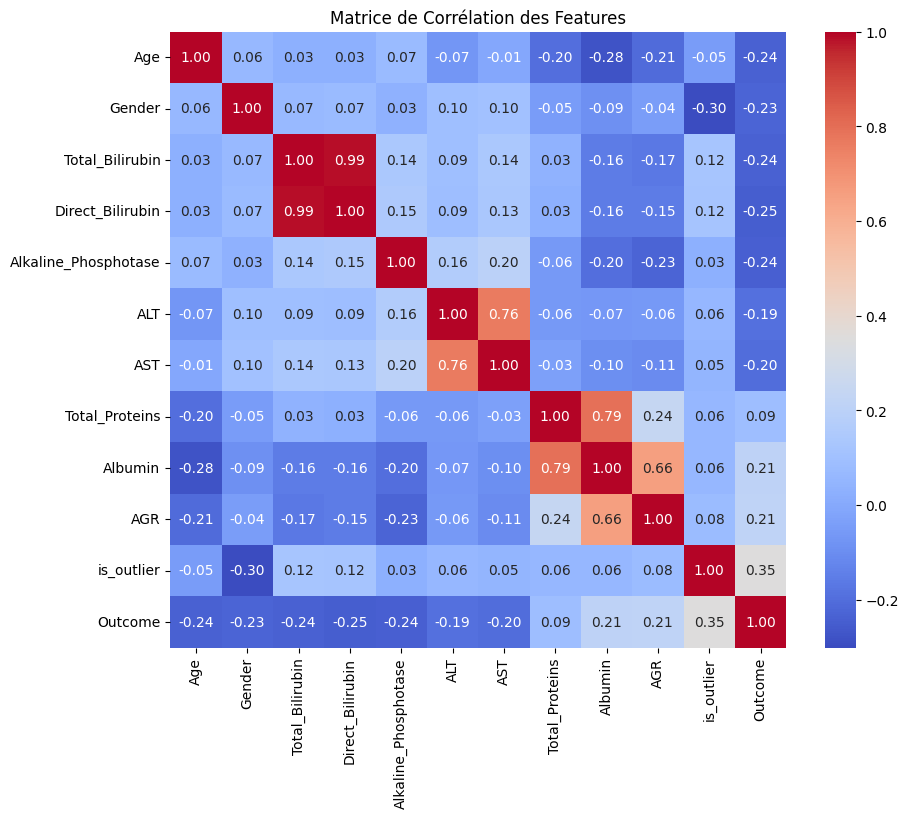

In [1613]:
correlation_matrix = df_standardized.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matrice de Corrélation des Features')
plt.show()

In [1614]:
def select_features(df):
    corr_target = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
    selected_features = corr_target[corr_target > 0.2].index.tolist()
    print(selected_features)
    return df[selected_features]

select_features(df_standardized)

['Outcome', 'is_outlier', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Total_Bilirubin', 'Age', 'Gender', 'AGR', 'Albumin', 'AST']


,Outcome,is_outlier,Direct_Bilirubin,Alkaline_Phosphotase,Total_Bilirubin,Age,Gender,AGR,Albumin,AST
0,1,0.668437,-0.327026,-0.377701,-0.357352,1.767257,-1.457283,-0.209818,0.113715,-0.292168
1,1,0.668437,-0.071171,1.945440,-0.113903,1.767257,0.686208,-0.785126,-0.148332,0.047631
2,1,-1.496026,-0.137504,0.997126,-0.199826,1.767257,0.686208,-0.209818,0.113715,-0.084973
3,1,-1.496026,-0.312812,-0.400388,-0.350192,0.545791,0.686208,0.149749,0.244738,-0.283880
4,1,0.668437,-0.237003,-0.341402,-0.280976,1.767257,0.686208,-2.007655,-1.065493,-0.122268
...,...,...,...,...,...,...,...,...,...,...
879,2,0.668437,-0.188547,-0.495673,-0.213254,-0.675675,0.686208,-1.123112,-1.136243,-0.201002
880,2,-1.496026,-0.291498,-0.414000,-0.314962,-0.675675,0.686208,0.617300,0.341014,-0.192714
881,2,0.668437,-0.311271,-0.250655,-0.338316,0.545791,-1.457283,0.659865,-0.114779,-0.250729
882,2,0.668437,-0.248675,-0.345940,-0.227239,-1.897142,-1.457283,-0.019799,0.488852,-0.221721


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Total_Bilirubin'}>],
       [<Axes: title={'center': 'Direct_Bilirubin'}>,
        <Axes: title={'center': 'Alkaline_Phosphotase'}>,
        <Axes: title={'center': 'ALT'}>],
       [<Axes: title={'center': 'AST'}>,
        <Axes: title={'center': 'Total_Proteins'}>,
        <Axes: title={'center': 'Albumin'}>],
       [<Axes: title={'center': 'AGR'}>,
        <Axes: title={'center': 'Outcome'}>, <Axes: >]], dtype=object)

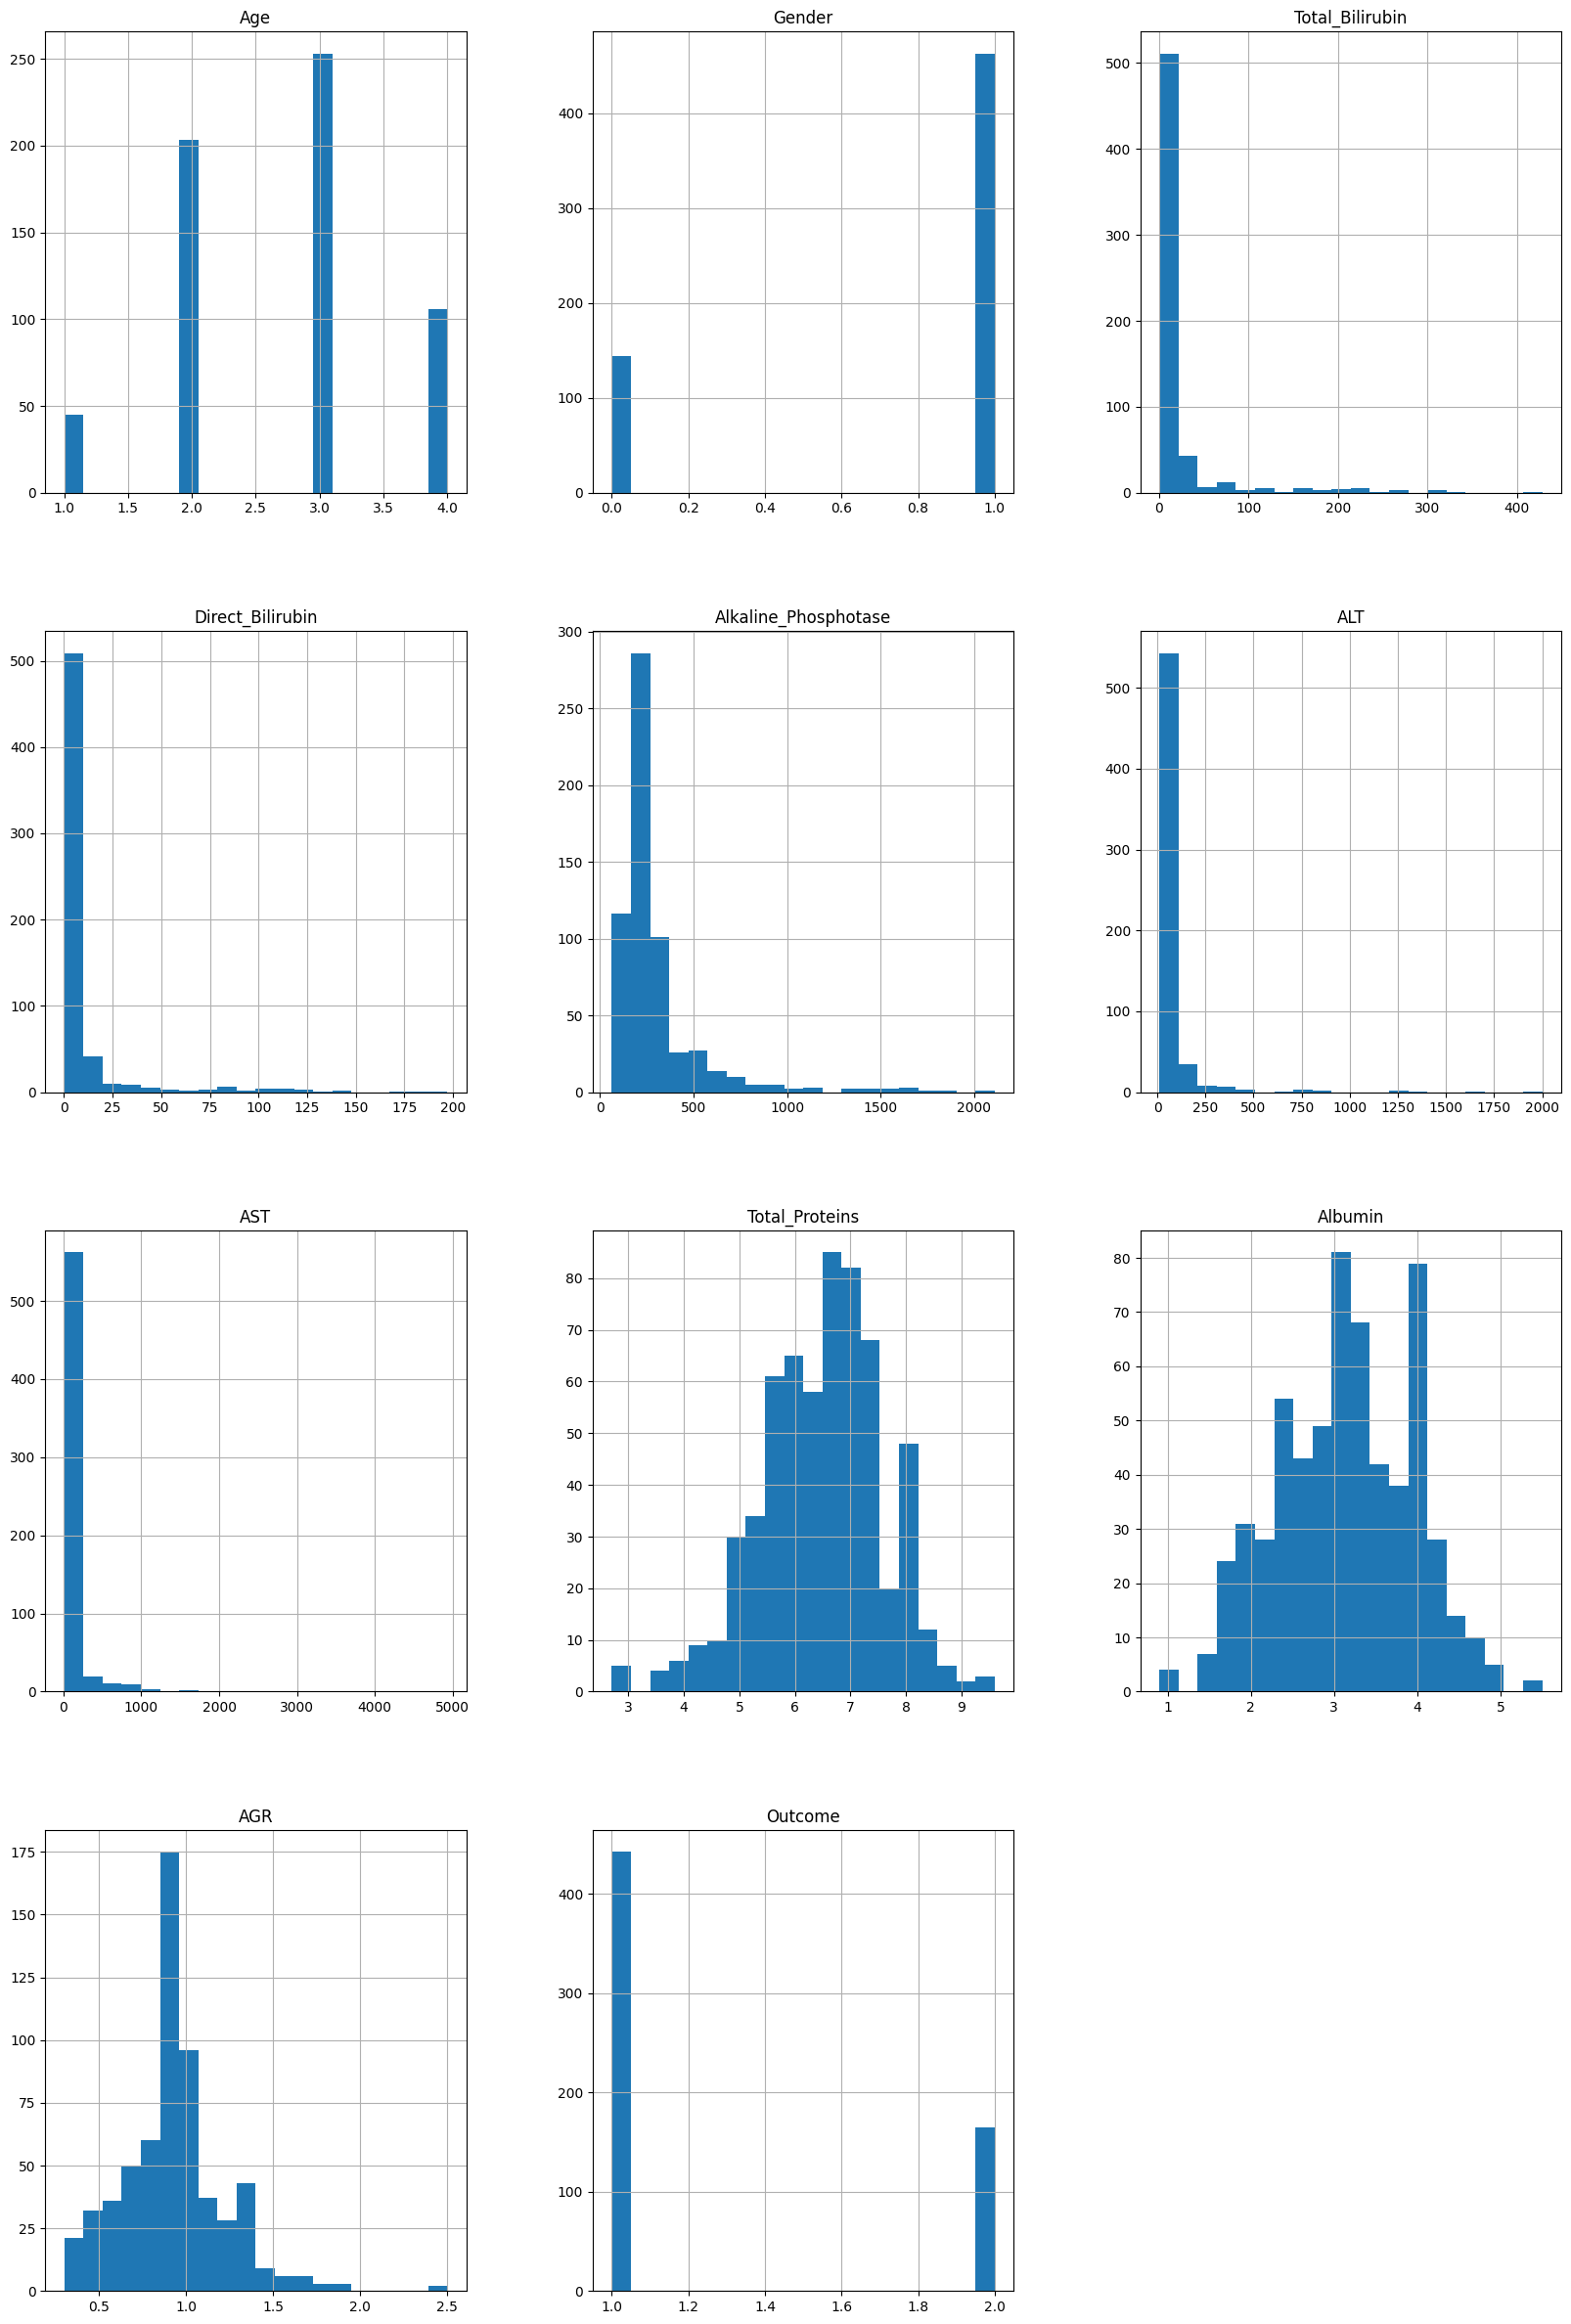

In [1615]:
# '20' was being interpreted as the 'column' arg; pass bins explicitly to avoid KeyError
df_combined.hist(bins=20, figsize=(20, 30))

In [1616]:
# Sauvegarder en CSV
df_normalized.to_csv('dataset_combined.csv', index=False)

# Pour utiliser le fichier, toujours le relire puis convertir proprement les colonnes en entiers nullable.
df_correct = pd.read_csv('dataset_combined.csv')



print("Utilisez df_correct pour avoir les mêmes données que l'original")
print(df_correct.head())
print(df_correct.dtypes)

Utilisez df_correct pour avoir les mêmes données que l'original
        Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0  1.000000     0.0         0.000468          0.000000              0.060576   
1  1.000000     1.0         0.024327          0.027425              0.310699   
2  1.000000     1.0         0.015906          0.020315              0.208598   
3  0.666667     1.0         0.001170          0.001524              0.058134   
4  1.000000     1.0         0.007953          0.009650              0.064485   

        ALT       AST  Total_Proteins   Albumin       AGR  is_outlier  Outcome  
0  0.013065  0.001626        0.594203  0.521739  0.272727         1.0        1  
1  0.027136  0.018296        0.695652  0.478261  0.200000         1.0        1  
2  0.013065  0.011791        0.623188  0.521739  0.272727         0.0        1  
3  0.002010  0.002033        0.594203  0.543478  0.318182         0.0        1  
4  0.008543  0.009961        0.666667  0.326087  0

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

class DataCleaningTransformer(BaseEstimator, TransformerMixin):
    """
    Transformer pipeline wrapper that expects function objects (callables):
      - resampling_method(df) -> df_resampled
      - data_imputation(df, na_columns) -> df_imputed
      - remove_outliers(df, threshold, num_std) -> df_no_outliers
      - standardisation(df) -> df_standardized
      - select_features(df) -> df_selected
    """
    def __init__(
        self,
        resampling_method,
        data_imputation,
        outlier_threshold=2,
        outlier_num_std=1,
        standardisation=None,
        select_features=None,
        remove_outliers=None
    ):
        self.resampling_method = resampling_method
        self.data_imputation = data_imputation
        self.outlier_threshold = outlier_threshold
        
        self.standardisation = standardisation
        self.select_features = select_features
        self.remove_outliers = remove_outliers

    def fit(self, X, y=None):
        # Rien à apprendre ici, tout est basé sur des fonctions déjà définies
        return self  

    def transform(self, X):
        # On travaille sur une copie
        df = X.copy()

        # 1) Colonnes avec des NA
        na_columns = df.columns[df.isna().any()].tolist()

        # 2) Imputation (certaines fonctions acceptent 'cols' argument)
        df_imputed = self.data_imputation(df, na_columns)

        # 3) Suppression des outliers (on passe threshold et num_std)
        #    remove_outliers must accept (df, threshold, num_std)
       
        df_no_outliers = self.remove_outliers(df_imputed, self.outlier_threshold, 1)
        # 4) Rééchantillonnage (SMOTE ou autre)
        df_resampled = self.resampling_method(df_no_outliers)

        # 5) Standardisation
        df_standardized = self.standardisation(df_resampled)

        # 6) Sélection de features
        df_selected = self.select_features(df_standardized)

        return df_selected


# === UTILISATION CORRECTE AVEC LES FONCTIONS EXISTANTES ===
# Note: pass the function objects, not dataframes:
transf = DataCleaningTransformer(
    resampling_method=smote,           # callable smote(df)
    data_imputation=data_imputation,   # callable data_imputation(df, cols)
    outlier_threshold=7,
    
    standardisation=standardisation,   # callable standardisation(df)
    select_features=select_features,   # callable select_features(df)
    remove_outliers=remove_outliers    # callable remove_outliers(df, threshold, num_std)
)

df_cleaned = transf.transform(df_combined3)
df_cleaned

       Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     True    True            False             False                 False   
1     True   False            False             False                  True   
2     True   False            False             False                 False   
3    False   False            False             False                 False   
4     True   False            False             False                 False   
..     ...     ...              ...               ...                   ...   
607   True   False            False             False                 False   
608   True   False            False             False                 False   
609   True   False            False             False                 False   
610  False   False            False             False                  True   
611  False   False            False             False                 False   

       ALT    AST  Total_Proteins  Albumin    AGR  

,Outcome,is_outlier,Direct_Bilirubin,Alkaline_Phosphotase,Total_Bilirubin,Age,Gender,AGR,Albumin,AST
0,1,0.0,-0.325550,-0.361954,-0.356231,1.745224,-1.442269,-0.247621,0.128972,-0.284468
1,1,0.0,-0.064113,2.054818,-0.105921,1.745224,0.693352,-0.819532,-0.664537,0.062393
2,1,0.0,-0.131893,1.068284,-0.194266,1.745224,0.693352,-0.104643,0.128972,-0.072968
3,1,0.0,-0.311026,-0.385555,-0.348869,0.518850,0.693352,0.109823,0.261223,-0.276008
4,1,0.0,-0.233563,-0.324192,-0.277702,1.745224,0.693352,-2.034842,-1.061291,-0.111038
...,...,...,...,...,...,...,...,...,...,...
879,2,0.0,-0.219086,-0.413877,-0.145209,-0.707523,0.693352,0.109823,0.657977,-0.030668
880,2,0.0,-0.320004,-0.305311,-0.352884,-1.933896,-1.442269,0.655725,0.354982,-0.233708
881,2,0.0,-0.309164,-0.380835,-0.326335,-0.707523,0.693352,-0.771484,-0.910831,-0.136418
882,2,0.0,-0.233563,-0.267549,-0.194419,-0.707523,-1.442269,-0.061838,-0.486798,-0.229478
